In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [4]:
# Load the dataset
df = pd.read_csv('HealthData.csv')

# Convert 'date' and 'timestamp' to datetime for better plotting
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['timestamp'])

# Set up the Jupyter notebook for inline plots
sns.set_context('talk')

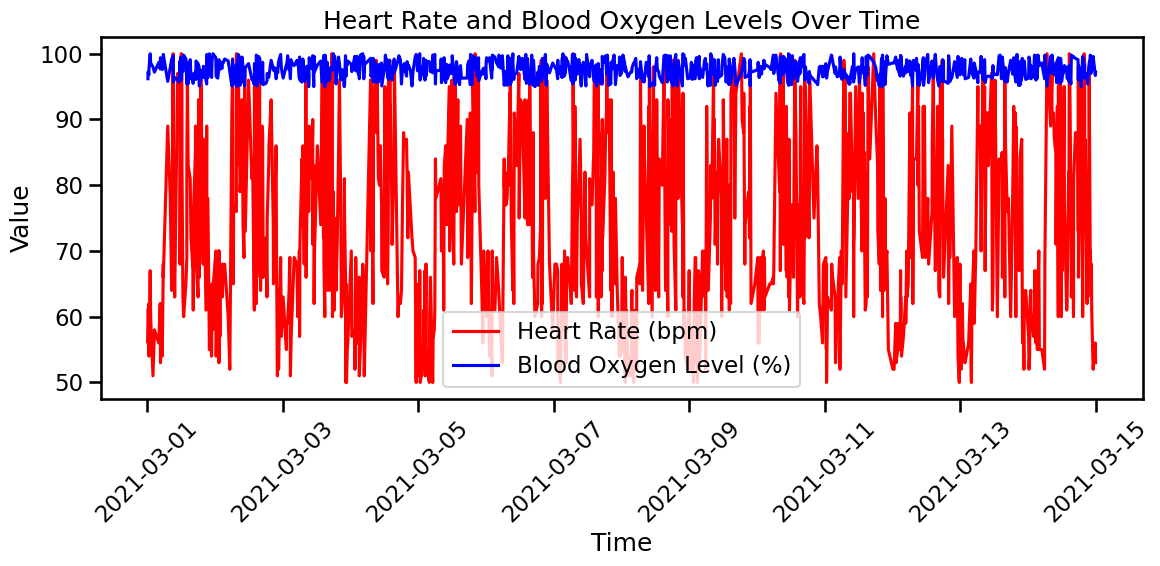

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime', y='heartrate', data=df, label='Heart Rate (bpm)', color='r')
sns.lineplot(x='datetime', y='blood_oxygen_level', data=df, label='Blood Oxygen Level (%)', color='b')
plt.title('Heart Rate and Blood Oxygen Levels Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

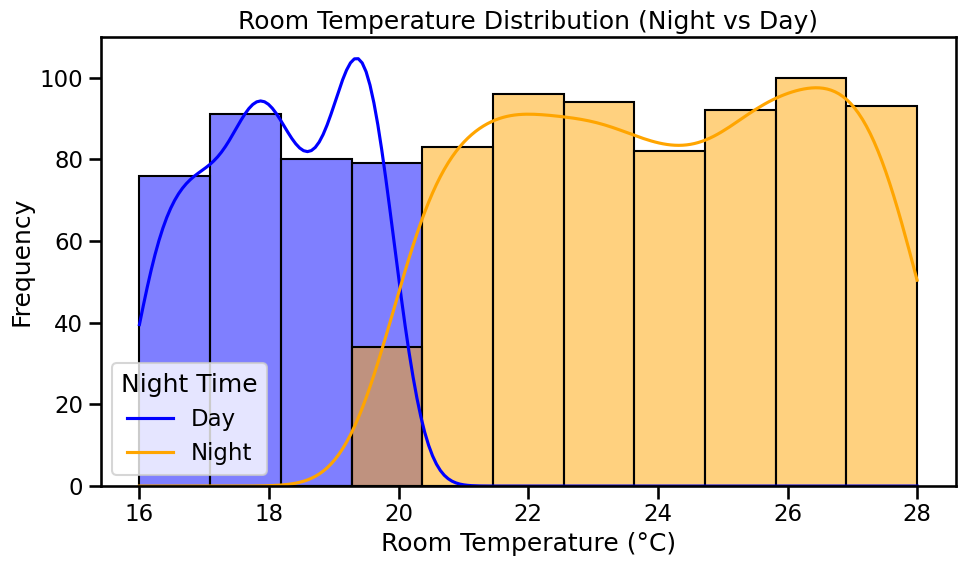

In [6]:

# 2. Visualization: Room Temperature Distribution with Night vs Day Highlight
df['is_night'] = df['datetime'].dt.hour.apply(lambda x: x < 6 or x >= 22)
plt.figure(figsize=(10, 6))
sns.histplot(df, x='room_temperature', hue='is_night', kde=True, palette={True: 'blue', False: 'orange'})
plt.title('Room Temperature Distribution (Night vs Day)')
plt.xlabel('Room Temperature (°C)')
plt.ylabel('Frequency')
plt.legend(title='Night Time', labels=['Day', 'Night'])
plt.tight_layout()
plt.show()

In [7]:
# 3. Interactive Visualization: Heart Rate vs. Blood Oxygen Level Scatter Plot
fig1 = px.scatter(df, x='heartrate', y='blood_oxygen_level', 
                  color='heartrate',  # Using heartrate itself for color coding
                  title="Heart Rate vs Blood Oxygen Level",
                  labels={"heartrate": "Heart Rate (bpm)", "blood_oxygen_level": "Blood Oxygen Level (%)"},
                  hover_data={'datetime': "|%B %d, %Y %H:%M:%S"})

fig1.show()


In [8]:
# 4. Interactive Visualization: Room Temperature Over Time
fig2 = px.line(df, x='datetime', y='room_temperature',
               title="Room Temperature Over Time",
               labels={"room_temperature": "Room Temperature (°C)", "datetime": "Time"},
               color_discrete_sequence=['blue'])

fig2.show()

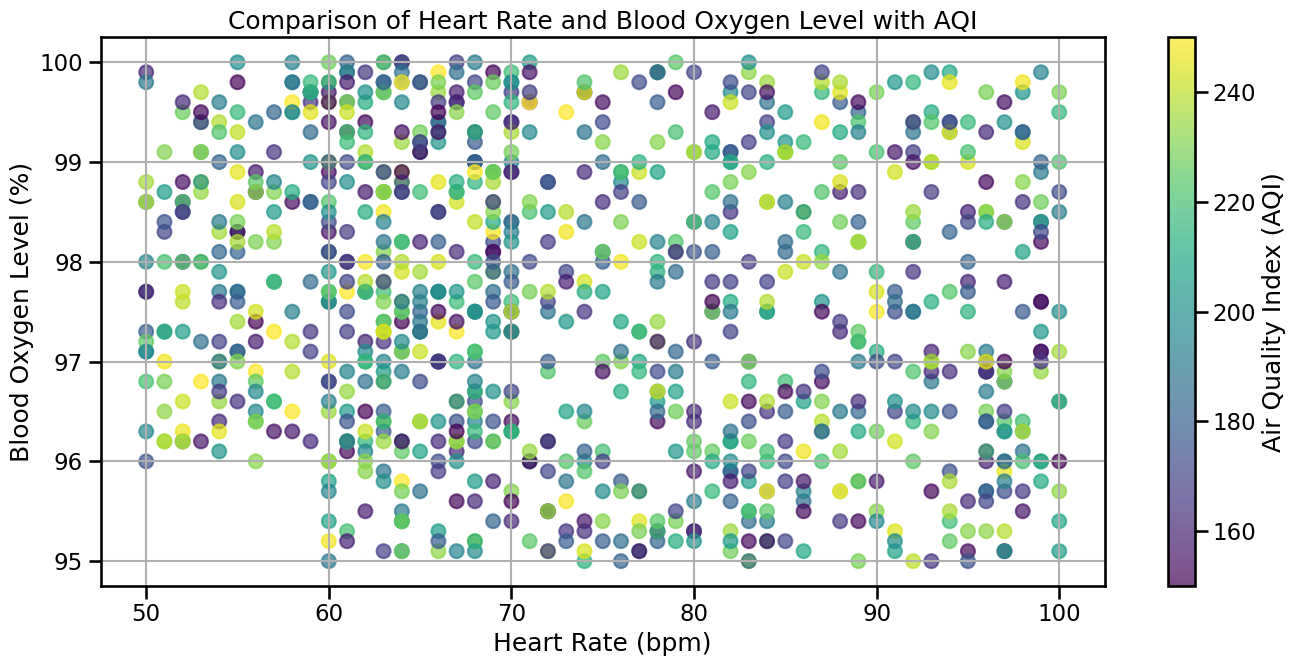

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('HealthData.csv')

# Convert 'date' and 'timestamp' to datetime for better plotting
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['timestamp'])

# 1. Visualization: Comparing AQI with Heart Rate and Blood Oxygen Level
plt.figure(figsize=(14, 7))

# Scatter plot for Heart Rate vs Blood Oxygen Level with AQI as color
scatter = plt.scatter(df['heartrate'], df['blood_oxygen_level'], c=df['air_quality'], cmap='viridis', s=100, alpha=0.7)

# Adding color bar for AQI
cbar = plt.colorbar(scatter)
cbar.set_label('Air Quality Index (AQI)')

# Plot details
plt.title('Comparison of Heart Rate and Blood Oxygen Level with AQI')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Blood Oxygen Level (%)')
plt.grid(True)
plt.tight_layout()

plt.show()


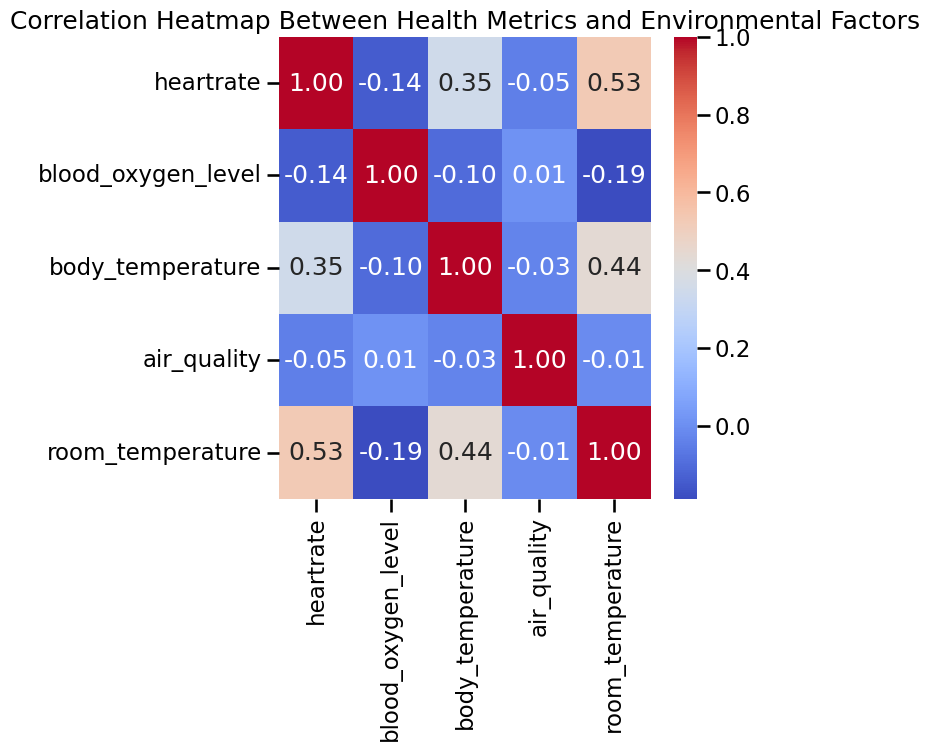

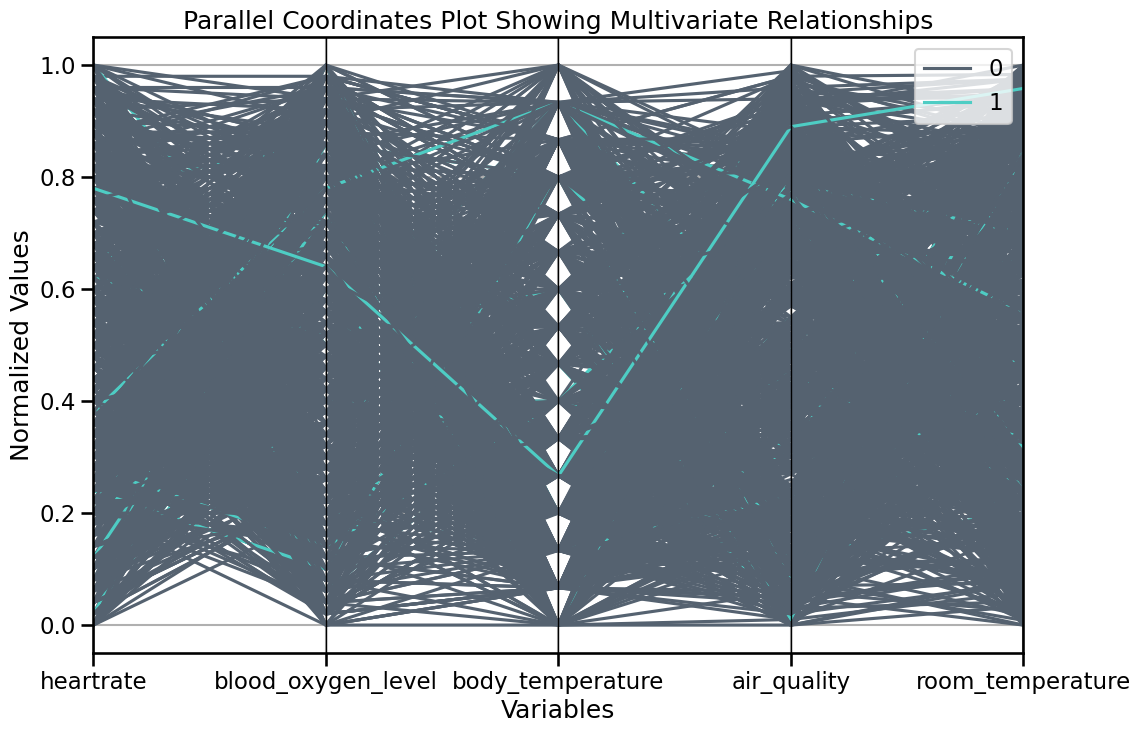

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Load the dataset
df = pd.read_csv('HealthData.csv')

# Convert 'date' and 'timestamp' to datetime for better plotting
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['timestamp'])

# 1. Heatmap to Show Correlations Between Variables
plt.figure(figsize=(6, 6))
correlation_matrix = df[['heartrate', 'blood_oxygen_level', 'body_temperature', 'air_quality', 'room_temperature']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Between Health Metrics and Environmental Factors')
plt.show()

# 2. Parallel Coordinates Plot to Explore Multivariate Relationships
# For visualization, let's normalize the data to bring all variables onto the same scale
df_normalized = df.copy()
df_normalized[['heartrate', 'blood_oxygen_level', 'body_temperature', 'air_quality', 'room_temperature']] = df_normalized[['heartrate', 'blood_oxygen_level', 'body_temperature', 'air_quality', 'room_temperature']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

plt.figure(figsize=(12, 8))
parallel_coordinates(df_normalized[['heartrate', 'blood_oxygen_level', 'body_temperature', 'air_quality', 'room_temperature', 'fall_detection']], 'fall_detection', color=('#556270', '#4ECDC4'))
plt.title('Parallel Coordinates Plot Showing Multivariate Relationships')
plt.xlabel('Variables')
plt.ylabel('Normalized Values')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` be

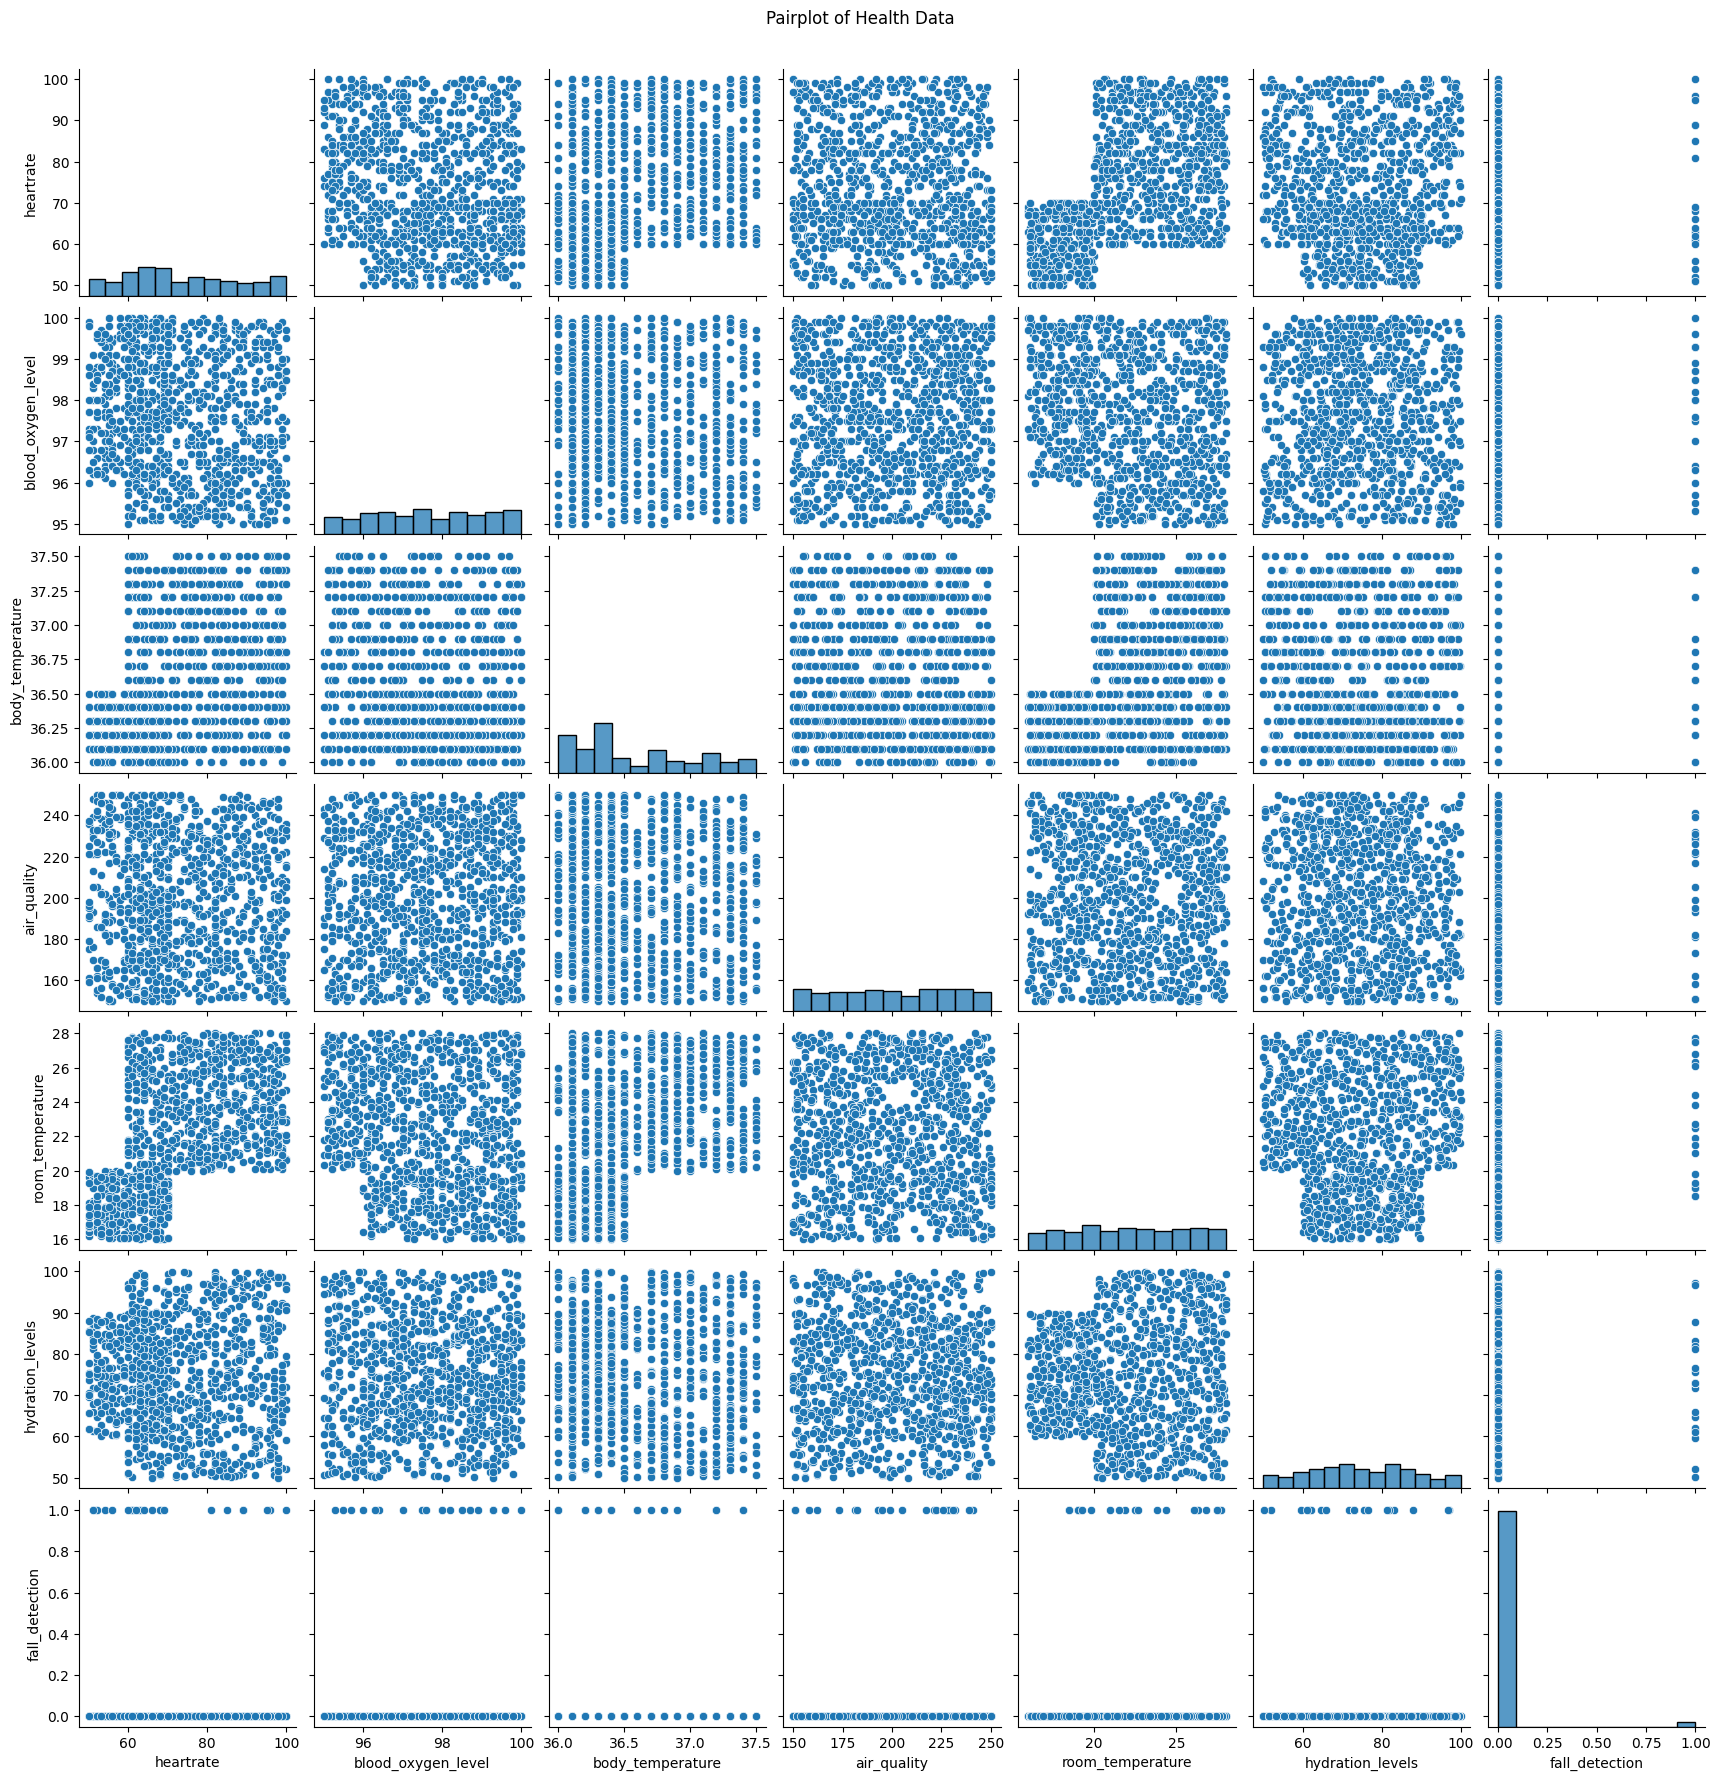

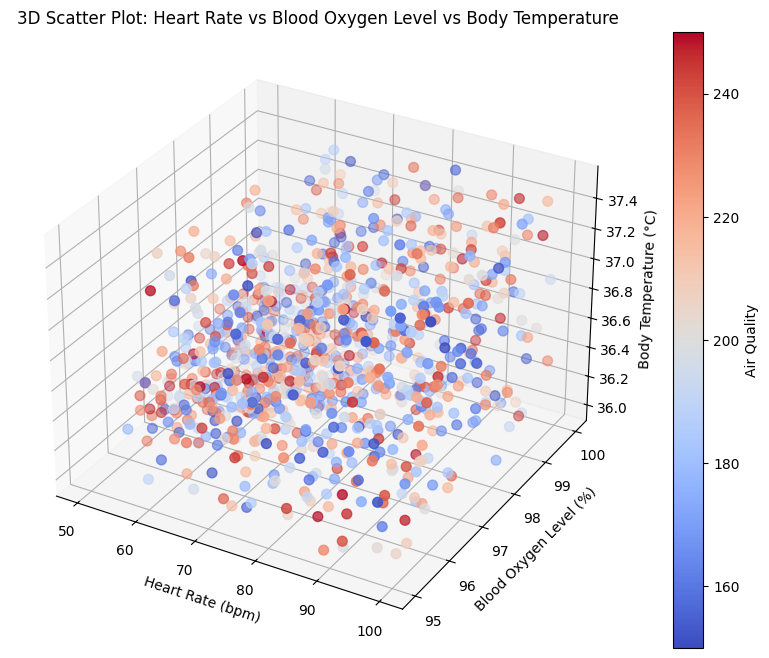

In [2]:
import pandas as pd

# Load the dataset
file_path = 'healthdata.csv'
health_data = pd.read_csv(file_path)

# Ensure all columns that should be numeric are properly converted
health_data_cleaned = health_data.copy()

# Convert each column to numeric, forcing errors to NaN
for col in ['heartrate', 'blood_oxygen_level', 'body_temperature', 'air_quality', 'room_temperature', 'hydration_levels']:
    health_data_cleaned[col] = pd.to_numeric(health_data_cleaned[col], errors='coerce')

# Drop rows with NaN values that could not be converted
health_data_cleaned = health_data_cleaned.dropna()

# Pairplot without Fall Detection
sns.pairplot(health_data_cleaned, palette='coolwarm')
plt.suptitle('Pairplot of Health Data', y=1.02)
plt.show()

# 3D Scatter Plot of Heart Rate, Blood Oxygen Level, and Body Temperature
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(health_data_cleaned['heartrate'], health_data_cleaned['blood_oxygen_level'], health_data_cleaned['body_temperature'], 
                     c=health_data_cleaned['air_quality'], cmap='coolwarm', s=50)
ax.set_xlabel('Heart Rate (bpm)')
ax.set_ylabel('Blood Oxygen Level (%)')
ax.set_zlabel('Body Temperature (°C)')
plt.title('3D Scatter Plot: Heart Rate vs Blood Oxygen Level vs Body Temperature')
plt.colorbar(scatter, ax=ax, label='Air Quality')
plt.show()
